In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
circ = 2*np.pi
half = 0.5*np.pi
# FUNCION PARA ITERATIVAMENTE DAR UN MAPEO
def simulation(iniciales, epsilon, tau, iterations=2000):
    """
    iniciales debe contener el angulo y momento inicial.
    esta implementacion ya toma en cuenta m, R = 1
    """
    marks = np.empty((iterations,2))
    marks[0] = iniciales
    for i in xrange(1,iterations):
        t,p = marks[i-1]
        next_p = p + epsilon*np.cos(t)
        next_t = (t + next_p*tau)%circ
        marks[i] = next_t,next_p
    return marks
# FUNCION PARA GENERAR CONDICIONES ALEATORIAS
def gen_conditions(t_range=[0,circ],p_range=[-half,half]):
    t = np.random.uniform(low=t_range[0],high=t_range[1])
    p = np.random.uniform(low=p_range[0],high=p_range[1])
    return [t,p]
# FUNCIONES PARA LAS GRAFICAS
# pa no hacer tanto codigo
def gen_axis(fig,loc):
    ax = fig.add_subplot(*loc);
    ax.set_xlim(0,circ);ax.set_xticks(np.array([0,0.5,1,1.5,2])*np.pi);
    ax.set_xticklabels(["0","1/2","1","3/2","2"]);
    ax.set_ylabel("Momento");
    ax.set_xlabel("Angulo\nUnidades en multiplos de $\pi$",fontdict={"size":18});
    return ax
def single_plot(orbit):
    fig,ax = gen_fig()
    ax.plot(orbit[2:-2,0],orbit[2:-2,1],"o",alpha=0.6);
    ax.plot(orbit[-1,0],orbit[-1,1],"o",alpha=0.9,c="r",ms=10);
    ax.plot(orbit[-2,0],orbit[-2,1],"o",alpha=0.8,c="r",ms=8);
    ax.plot(orbit[0,0],orbit[0,1],"o",alpha=0.9,c="g",ms=10);
    ax.plot(orbit[1,0],orbit[1,1],"o",alpha=0.8,c="g",ms=8);
def figureD(e_range,examples=15,s=(17,27)):
    fig = plt.figure(figsize=s);
    i,I = 0, len(e_range)
    for e in e_range:
        i+=1
        ax = gen_axis(fig,[I,1,i])
        if i != I:
            ax.set_xlabel("");        
        for n in xrange(examples):
            init,tau  = gen_conditions(),1.0
            orbit = simulation(init,e,tau)
            ax.plot(orbit[:,0],orbit[:,1],".",alpha=0.5,ms=3);
        # punto fijo de arriba
        orbit = simulation([half,0],e,tau)
        ax.plot(orbit[:,0],orbit[:,1],".",c="k",alpha=0.5,ms=7);
        # punto fijo de abajo
        # aqui reduzco el numero de iteraciones porque hay un arrastre numerico
        # que saca a la simulacion del punto fijo
        orbit = simulation([3*half,0],e,tau,iterations=50)
        ax.plot(orbit[:,0],orbit[:,1],".",c="k",alpha=0.5,ms=7);

## B)

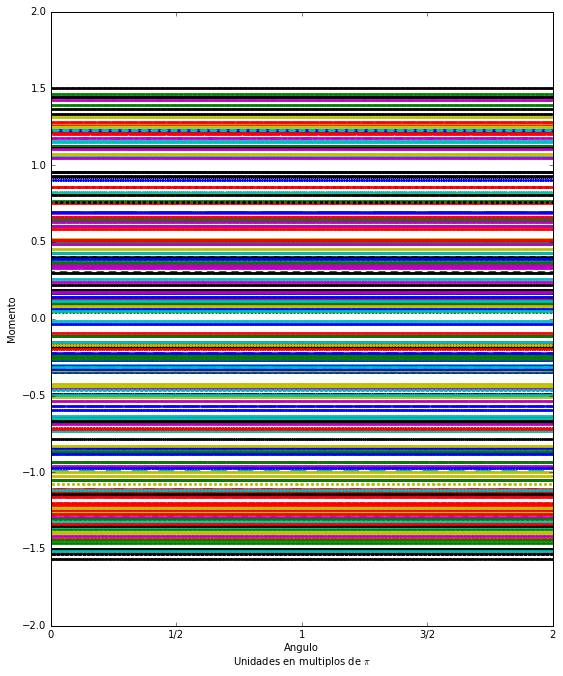

In [166]:
fig = plt.figure(figsize=(9,11))
ax = gen_axis(fig,[1,1,1])
for n in xrange(200):
    init,e,tau  = gen_conditions(),0.0,1.0
    orbit = simulation(init,e,tau)
    ax.plot(orbit[:,0],orbit[:,1],".",alpha=0.6,ms=3);

## C)

Sí, hay puntos fijos. Puedo deducir esto de analizar las relaciones de recurrencia para $\theta$ y $p$:

$$ \theta_{i+1} = \theta_{i} + \frac{p_{i+1}}{mR^{2}}\,\tau \quad \textrm{, y} $$
$$ p_{i+1} = p_{i} + \epsilon\,cos(\theta_{i}) ,$$

junto con la definición de un _punto fijo_:
$$ \theta_{i+1} = \theta_{i} \quad  p_{i+1} = p_{i} $$

Si sustituyo las relaciones de recurrencia en la definición, obtengo que:

$$ \theta_{i} = \theta_{i} + \frac{p_{i}}{mR^{2}}\,\tau \quad \textrm{(1)} $$
$$ p_{i} = p_{i} + \epsilon\,cos(\theta_{i}) \quad \textrm{(2)}$$

De manera que de (1) tengo la condicon de que, si $\theta_{f},p_{f}$ son la coordenadas del punto fijo:

$$ p_{f} = 0 $$

y (2) restringe a que $\theta$ sea un cero de la función coseno:

$$ \theta_{f} = \frac{2n+1}{2}\pi \quad n\in \mathbb{Z}$$

## D) Simulaciones perturbadas

In [158]:
e_range = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.7, 1.1]

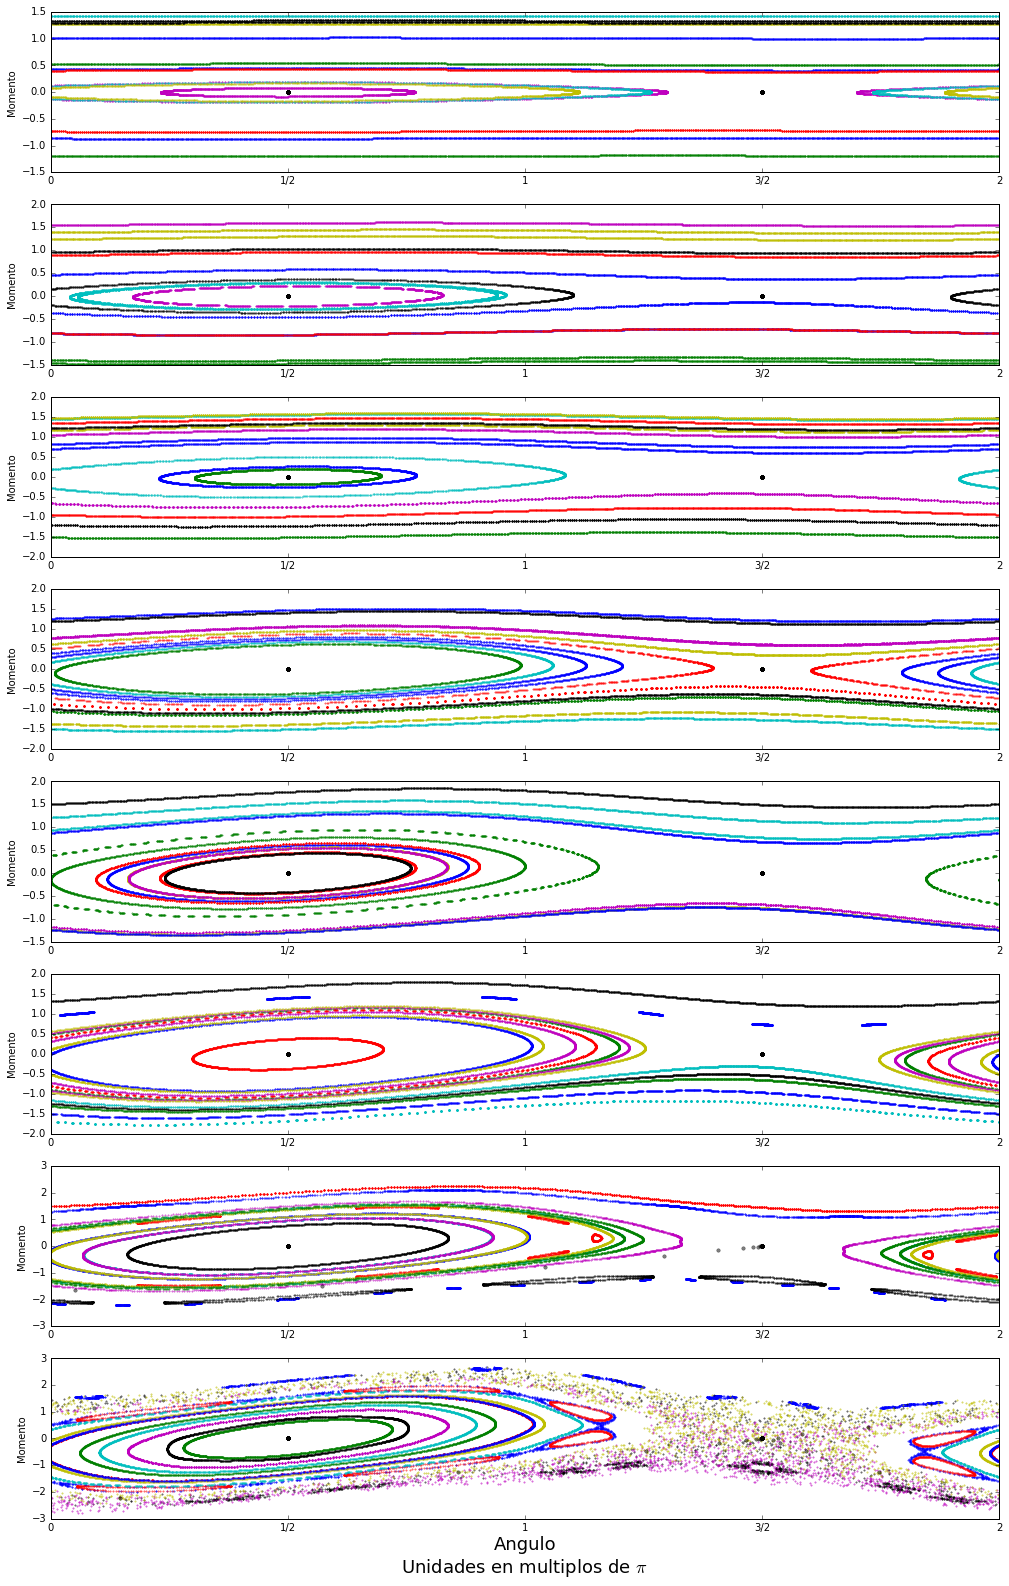

In [171]:
figureD(e_range)